# 신경망 기초

- MLP, CNN 소개
- MNIST 이미지 인식
- colab에서 실행 권장 (PC에서는 텐서플로우/케라스 등을 설치해야 하고 속도가 느림)

# Multilayer Perceptron (MLP)

- 선형 모델을 확대하여 선형 모델의 성능을 개선함
- 입력층과 출력층 사이에 다수의 은닉(hidden)층을 둔다
- 층(layer) 사이는 전결합망 (fully connected layer) 계수들로 연결한다 (FC라고도 부른다)
 - 이를 밀집망(Dense)이라고도 부른다
- MLP는 선형모델보다는 성능이 개선되었으나, 이미지 인식 등에서는 기대한만큼 성능이 나오지 않음
- 뒤에서 설명할 CNN이 이미지 인식의 성능을 달성함
- MLP 구조 (입력으로 "1차원 벡터" 형식만 사용한다)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.03.53.png?raw=1" align='left'>

## 활성화 함수 (Activation Function)
- 각 노드의 출력단에 활성화 함수를 적용했다
- "선형" 모델과 달리 "비선형" 동작을 추가함


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.48.08.png?raw=1" align='left'  width=400>



- MLP는 회귀 및 분류에 모두 사용 가능 (마지막 층 활성화 함수로 구분된다)
- 분류를 위해서는 softmax를 사용, 회귀를 위해서는 출력값을 그대로 사용  
- 입력 및 은닉층에서는 ReLU 를 주로 사용하고 시그모이드와 tanh도 필요시 사용


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.05.02.png?raw=1" align='left'  width=400>

## 신경망 학습
- 신경망도 경사하강법을 사용하나, 지역 최소값에 머무는 문제를 해결하기 위해서 가속도 알고리즘을 사용한다 (adam, rmsprop 등)
- 여러 계층을 통해서 역방향으로 학습을 수행해야 하는데(계수 업데이트) 이를 역전파 (back propagation)라고 한다
- 가속도 알고리즘 https://goo.gl/Pdu4uW
- 가속도 알고리즘
https://medium.com/@kaitotally/adam-the-birthchild-of-adagrad-and-rmsprop-b5308b24b9cd

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.39.07.png?raw=1" align='left' width=400>

## 플레이그라운드 (MLP 실습)
- http://playground.tensorflow.org

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install keras

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

## MNIST 이미지 확인

11493376/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

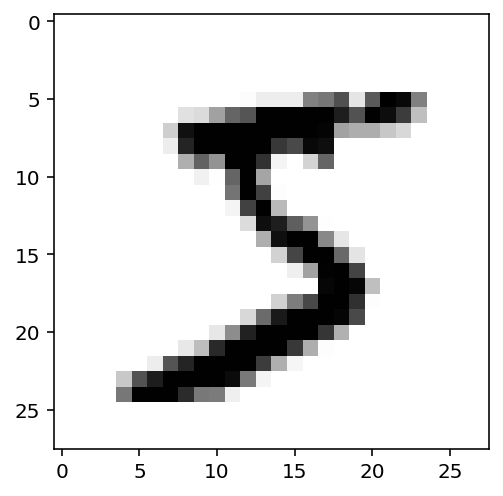

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

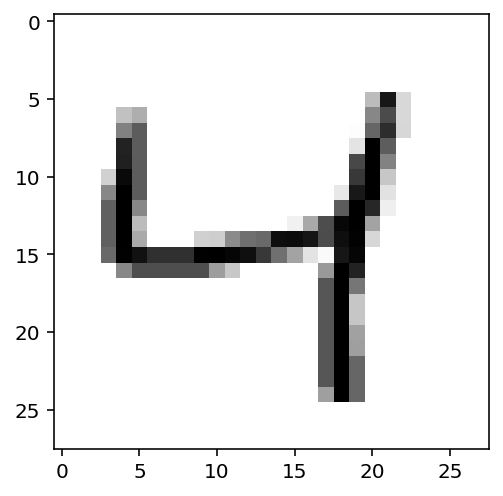

In [ ]:
plt.imshow(train_images[2], cmap=plt.cm.binary)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

### MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터형태만 입력으로 사용할 수 있다
- 목적 변수는 원 핫 인코딩을 한다. to_categorical를 사용한다

In [ ]:
train_images_flat = train_images.reshape(60000, 784)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [ ]:
train_labels_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## MLP 모델

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (784,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images_flat, train_labels_cat, epochs=3, batch_size=30)

Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5573 - accuracy: 0.8489
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1955 - accuracy: 0.9439
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9532


In [ ]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9579
test_acc =  0.9578999876976013


# CNN

- CNN 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.42.19.png?raw=1" align='left'  width=300>

>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.43.31.png?raw=1" align='left'  width=400>

## CNN 동작
- 이미지 필터링 https://setosa.io/ev/image-kernels/
- 컨볼류션 동작 (주소 뒤에 '.' 추가) https://cdn-images-1.medium.com/max/1600/0*iqNdZWyNeCr5tCkc.
- 커널 depth https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif
- CNN 개념 유튜브 https://www.youtube.com/watch?v=9Cu2UfNO-gw

### max pooling

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.27.14.png?raw=1" align='left'  width=300>

### MNIST 인식 모델

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.09.17.png?raw=1" align='left'>

##  사물 구분
<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.43.00.png?raw=1" align='left'  width=500>


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-13%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.44.02.png?raw=1" align='left'>

### 텐서 차원의 의미

- 딥러닝 모델에서 텐서 axis의 의미 약속
> [#-samples, shape-of-a-sample, #-features]

- 예: 데이터가 200 장의 컬러 이미지이고, 각 이미지가 (244, 244) 크기의 픽셀로 구성되며, 각 픽셀이 3원색으로 구성되어 있다면
> X.shape => (200, 244, 244, 3)


## CNN 모델 구현

In [ ]:
train_images_cnn = train_images.reshape(60000,28,28,1)
test_images_cnn = test_images.reshape(10000,28,28,1)

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28,1), padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(20, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(10, (3,3), activation='relu', padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 20)        5780      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 10)          1810      
_________________________________________________________________
flatten_2 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

- padding='valid'를 사용하면 피처맵의 크기가 가로, 세로 2씩 줄어든다 (26,26)

In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images_cnn, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 4s 4ms/step - loss: 1.8840 - accuracy: 0.5759
Epoch 2/3
938/938 [==============================] - 3s 4ms/step - loss: 0.1587 - accuracy: 0.9543
Epoch 3/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0910 - accuracy: 0.9727


In [ ]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9759
test_acc =  0.9758999943733215


# MLP를 이용한  회귀 예측

- MLP는 이미지 인식에는 거의 사용하지 않고 회귀 예측에서, 선형모델을 개선하기 위해서 주로 사용한다

In [ ]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape

57344/57026 [==============================] - 0s 0us/step


(404, 13)

In [ ]:
x_train[:3], y_train[:3]

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
         6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
         2.10000e+01, 3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
         7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
         1.47000e+01, 3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
         4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.75520e+02, 3.26000e+00]]), array([15.2, 42.3, 50. ]))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (13,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

In [ ]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [ ]:
record = model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=1)

Epoch 1/32
51/51 [==============================] - 1s 3ms/step - loss: 600.7267
Epoch 2/32
51/51 [==============================] - 0s 2ms/step - loss: 530.1464
Epoch 3/32
51/51 [==============================] - 0s 2ms/step - loss: 534.9717
Epoch 4/32
51/51 [==============================] - 0s 3ms/step - loss: 497.2892
Epoch 5/32
51/51 [==============================] - 0s 3ms/step - loss: 501.3401
Epoch 6/32
51/51 [==============================] - 0s 2ms/step - loss: 478.5774
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 439.3036
Epoch 8/32
51/51 [==============================] - 0s 2ms/step - loss: 407.4474
Epoch 9/32
51/51 [==============================] - 0s 3ms/step - loss: 398.6365
Epoch 10/32
51/51 [==============================] - 0s 2ms/step - loss: 338.3229
Epoch 11/32
51/51 [==============================] - 0s 3ms/step - loss: 293.1346
Epoch 12/32
51/51 [==============================] - 0s 3ms/step - loss: 239.3916
Epoch 13/32
51/51 [======

In [ ]:
model.predict(x_test[:10]), y_test[:10]

array([[ 4.8955355],
       [21.511457 ],
       [25.599527 ],
       [35.141815 ],
       [28.320784 ],
       [21.71168  ],
       [33.408226 ],
       [26.911348 ],
       [19.38376  ],
       [22.815626 ]], dtype=float32)

In [ ]:
record.history.keys()

dict_keys(['loss'])

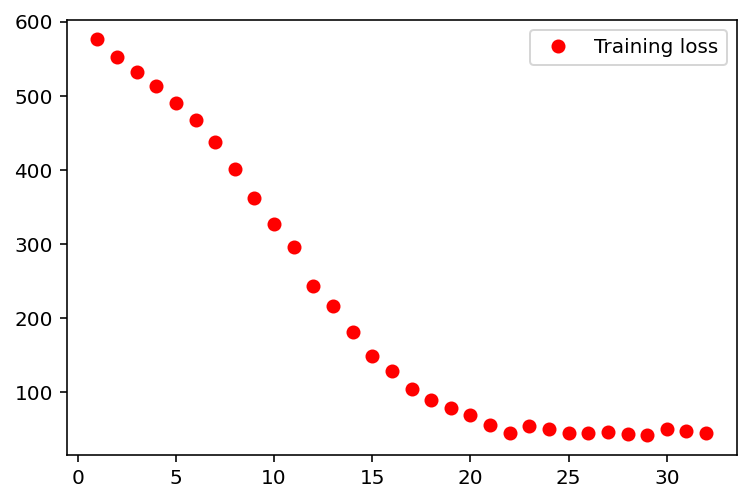

In [ ]:
loss = record.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6493541596909549

# 최적의 신경망 설계
## 최적의 은닉층 수 (n)
- n이 클수록 신경망이 표현할 수 있는 추상화가 다양해진다, 즉, 복잡한 입력 형태를 처리할 수 있다
- n이 클수록 과대적합될 수 있다. 
- 과대적합을 피하려면 학습 데이터가 더 다양하게 많거나, 모델을 간단히 해야 한다. 즉, n을 줄여야 한다
- 처음에 은닉층은 2개 정도만 사용하여 동작을 확인하는 것이 필요하다 (기본 동작은 한다)
- 점차 n을 키우면서 성능이 개선되고, 과대적합이 발생하지 않는지를 관찰한다
- 최고의 성능을 확인한후, 필요하면 (계산량을 줄이는 목적 등), 성능을 유지하는 범위 내에서 최소한의 n을 줄여서 선택한다

## 최적의 셀 수 (m)
- 저수준의 특성이 다양하면 앞단의 m을 크게 한다
- 추상화가 될수록 즉, 고수준의 특성이 다양하면 뒷단의 m을 크게 한다 (보통 고수준의 특성이 다양해진다)